In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Defining classes
classes={'N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4}

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Loading the data
df1 = pd.read_csv('/content/gdrive/My Drive/mitbih_train.csv', header=None, index_col=False)
df2 = pd.read_csv('/content/gdrive/My Drive/mitbih_test.csv', header=None, index_col=False)
data = pd.concat([df1, df2], axis=0)

In [ ]:
# Checking the data
data.head()
data.info()
data[187].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109446 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 157.8 MB


0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64

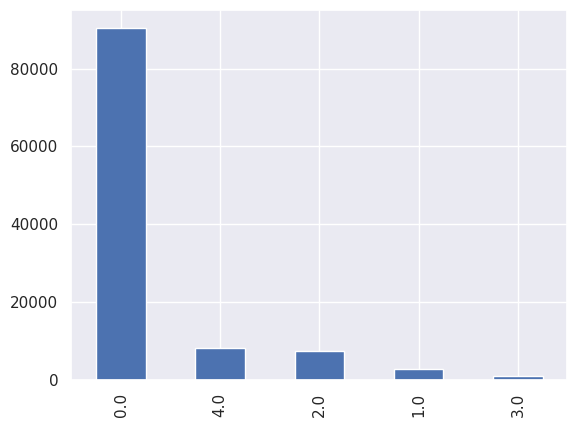

In [ ]:
data[187].value_counts().plot(kind='bar')
plt.savefig('count_classes_bar.png')
plt.show()

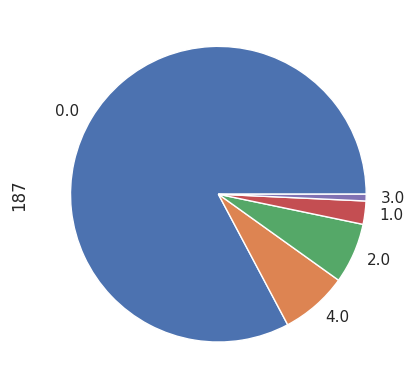

In [ ]:
data[187].value_counts().plot(kind='pie')
plt.savefig('count_classes_pie.png')
plt.show()

In [ ]:
# Splitting the data into features and target
X_train = data.iloc[:,:-1]
y_train = data.iloc[:,-1]

In [ ]:
# Shuffling the data
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2)
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((21890, 187), (21890,))

In [ ]:
# Splitting the test data into testing and validation sets
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)
X_test.shape, X_val.shape
y_test.shape, y_val.shape

((10945,), (10945,))

In [ ]:
# Importing necessary libraries for model creation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [ ]:
# Defining callbacks
earlyStopping = EarlyStopping(patience=100,
                              mode='max',
                              monitor='val_loss',
                              restore_best_weights=True)

reduceLR = ReduceLROnPlateau(monitor='val_loss',
                             min_lr=0.0001)

modelCheck = ModelCheckpoint(filepath='model.h5',
                monitor='val_loss',
                save_best_only=True)

callbacks = [earlyStopping,
             reduceLR,
             modelCheck]

In [ ]:
# Defining the model
model = Sequential([
                    Dense(256,activation='relu',input_shape=(187,)),
                    BatchNormalization(),

                    Dense(512,activation='relu'),
                    BatchNormalization(),

                    Dense(256,activation='relu'),
                    BatchNormalization(),

                    Dense(5,activation='softmax')
                 ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               48128     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100,batch_size=128,
                 callbacks=callbacks
                 )

Epoch 1/100
685/685 [==============================] - 15s 19ms/step - loss: 0.1947 - accuracy: 0.9508 - val_loss: 0.1269 - val_accuracy: 0.9634 - lr: 0.0010
Epoch 2/100
  9/685 [..............................] - ETA: 9s - loss: 0.1966 - accuracy: 0.9427

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


685/685 [==============================] - 11s 17ms/step - loss: 0.1148 - accuracy: 0.9679 - val_loss: 0.1120 - val_accuracy: 0.9679 - lr: 0.0010
Epoch 3/100
685/685 [==============================] - 11s 16ms/step - loss: 0.0963 - accuracy: 0.9728 - val_loss: 0.1144 - val_accuracy: 0.9687 - lr: 0.0010
Epoch 4/100
685/685 [==============================] - 11s 16ms/step - loss: 0.0840 - accuracy: 0.9751 - val_loss: 0.0894 - val_accuracy: 0.9756 - lr: 0.0010
Epoch 5/100
685/685 [==============================] - 12s 17ms/step - loss: 0.0708 - accuracy: 0.9787 - val_loss: 0.1816 - val_accuracy: 0.9377 - lr: 0.0010
Epoch 6/100
685/685 [==============================] - 12s 17ms/step - loss: 0.0727 - accuracy: 0.9780 - val_loss: 0.0877 - val_accuracy: 0.9735 - lr: 0.0010
Epoch 7/100
685/685 [==============================] - 11s 17ms/step - loss: 0.0663 - accuracy: 0.9794 - val_loss: 0.0741 - val_accuracy: 0.9786 - lr: 0.0010
Epoch 8/100
685/685 [==============================] - 10s 15ms/

In [ ]:
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

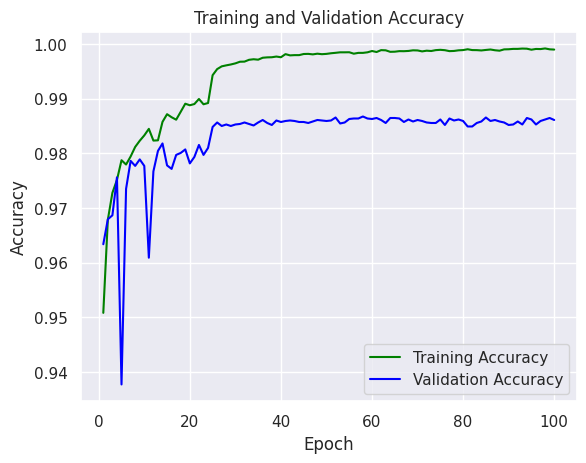

<Figure size 640x480 with 0 Axes>

In [ ]:
# Accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

plt.show()

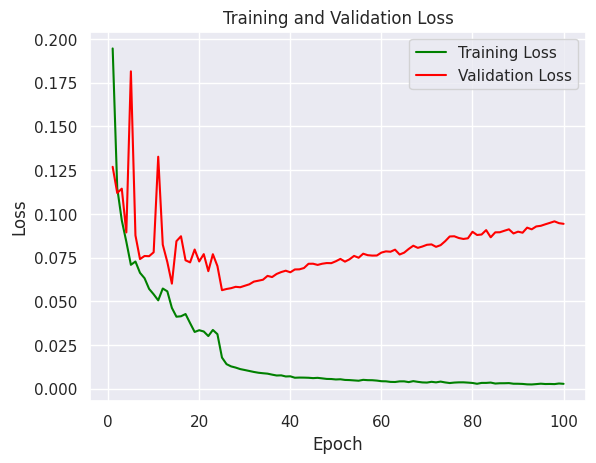

In [ ]:
# Loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

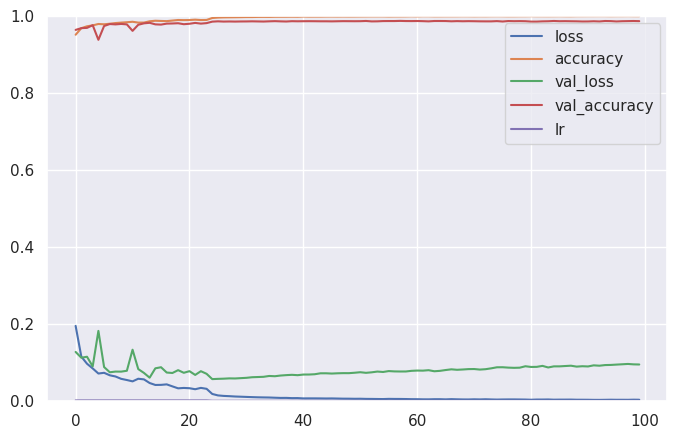

In [ ]:
# History
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Evaluating the model
model.evaluate(X_test,y_test)

343/343 [==============================] - 1s 4ms/step - loss: 0.1022 - accuracy: 0.9860


[0.102198526263237, 0.9860210418701172]

In [ ]:
# Predictions
predictions = model.predict(X_test)

343/343 [==============================] - 2s 5ms/step


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      9066
         1.0       0.89      0.82      0.85       287
         2.0       0.96      0.96      0.96       696
         3.0       0.88      0.75      0.81        76
         4.0       1.00      0.99      0.99       820

    accuracy                           0.99     10945
   macro avg       0.94      0.90      0.92     10945
weighted avg       0.99      0.99      0.99     10945



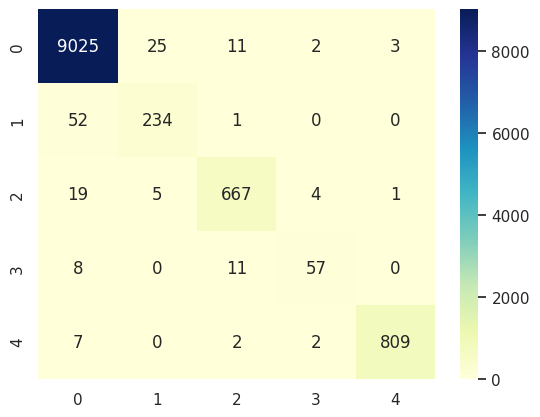

In [ ]:
# Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions.argmax(axis=1))

sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")
plt.savefig('confusion_matrix.png')